In [6]:
from variable.variable import Variable
from activation_functions.relu import ReLUActivation
relu_fn = ReLUActivation()

In [7]:
x = Variable(3)
y = Variable(4)

In [8]:
z = x + y 

In [9]:
x = Variable([[1, 2, 3], [4, 5, 6]])
y = Variable([[2, 3, 4], [5, 6, 7]])

z = x + y


In [10]:
x

[[Variable(data=1, grad=0, _op=None, name=None, requires_grad=True, _prev=set()),
  Variable(data=2, grad=0, _op=None, name=None, requires_grad=True, _prev=set()),
  Variable(data=3, grad=0, _op=None, name=None, requires_grad=True, _prev=set())],
 [Variable(data=4, grad=0, _op=None, name=None, requires_grad=True, _prev=set()),
  Variable(data=5, grad=0, _op=None, name=None, requires_grad=True, _prev=set()),
  Variable(data=6, grad=0, _op=None, name=None, requires_grad=True, _prev=set())]]

In [11]:
from models.simple_model import SimpleModel
input_size = 3
hidden_size = 10
output_size = 1


model = SimpleModel(input_size, hidden_size, output_size)

In [12]:
from optimizer.sgd import SGDOptimizer
from loss_functions.mse import MSELoss
from variable.variable import Variable
import random

loss_fn = MSELoss()

optimizer = SGDOptimizer(model.parameters(), learning_rate=0.0001)

losses = []
#let's feed random input and make the model always output 0

for i in range(100):
    x = [[Variable(random.randint(0, 10)) for i in range(input_size)]]
    y = [[Variable(0)]]
    output = model(x)
    loss = loss_fn(output, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(loss)
    losses.append(loss.loss)


Loss: 5122.3421757179885
Loss: 736.8616434605553
Loss: 648.7035787493862
Loss: 750.7237863390204
Loss: 935.4556506879132
Loss: 32.76120059441529
Loss: 364.1931782763367
Loss: 250.59951986124142
Loss: 58.87431405520708
Loss: 31.423458554503842
Loss: 189.08197385080322
Loss: 83.65180978603058
Loss: 7.547598818153907
Loss: 74.01782387516357
Loss: 27.45985351438525
Loss: 26.769854179444184
Loss: 21.719626458857903
Loss: 18.400577134835125
Loss: 2.5661490255181842
Loss: 0.08905430933957302
Loss: 22.170337986591765
Loss: 4.800433344832109
Loss: 13.775238673308776
Loss: 6.476614081204252
Loss: 8.330217824576634
Loss: 0.4522473896247366
Loss: 2.6745494738135034
Loss: 2.0546917924816417
Loss: 12.903011260337877
Loss: 0.13939002030857647
Loss: 0.08770409878797072
Loss: 9.098655464958274
Loss: 0.37503779874110016
Loss: 0.98014983643776
Loss: 1.993741915289118
Loss: 3.1666004860517964
Loss: 1.3805471057763663
Loss: 2.384762080274436
Loss: 0.0922016045622723
Loss: 6.048504763008827
Loss: 2.75073523

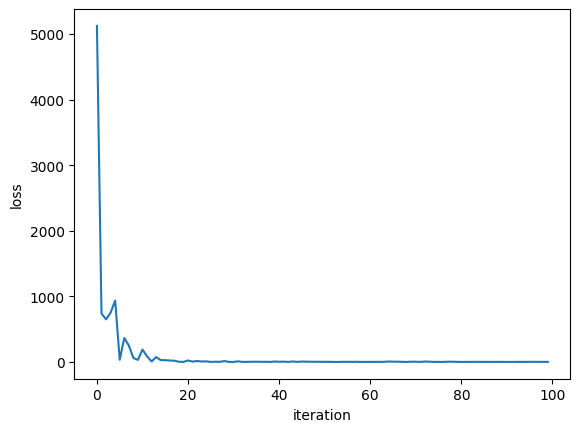

In [13]:
#plot the losses
import matplotlib.pyplot as plt
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.show()

